In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import tensorflow
import seaborn as sns
from tensorflow import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix

## **Loading and splitting the dataset**

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
train = np.concatenate((trainX,testX)) 
test = np.concatenate((trainy,testy)) 
print(len(train))
print(len(test))

70000
70000


In [6]:
data_train, data_test, target_train, target_test =  train_test_split(train,test,stratify=test, test_size=0.25,random_state=42)

In [7]:
print(len(data_train),len(target_train))
print(len(data_test),len(target_test))

52500 52500
17500 17500


Selecting 9 random images and displaying them with class labels

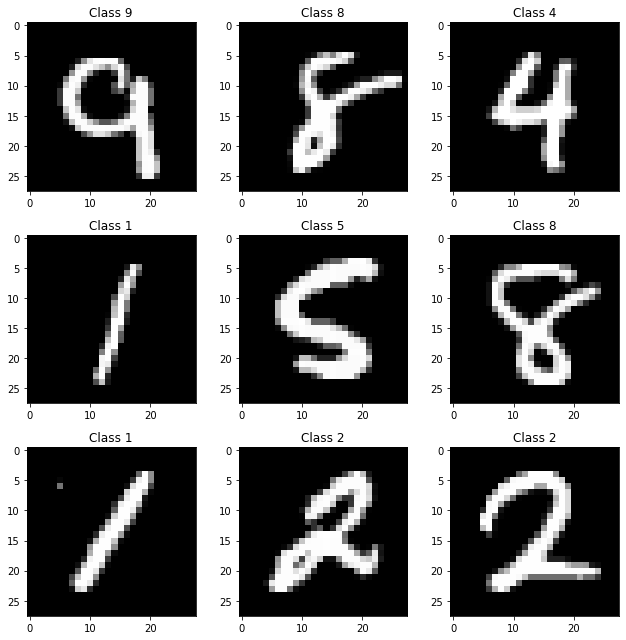

In [8]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
    plt.subplot(3,3,i+1)
    r = random.randint(0, len(data_train))
    plt.imshow(data_train[r], cmap='gray', interpolation='none')
    plt.title("Class {}".format(target_train[r]))
    
plt.tight_layout()

In [9]:
# Matrix shows how grayscale images are stored in a array
def matprint(mat, fmt="g"):
    col = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col[i])+fmt+"}").format(y), end="  ")
        print("")
       
r = random.randint(0, len(data_train))
matprint(data_train[r])

0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0    0   18  116  234  255  202   30   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    0    0   64  199  220  119   91  230  144   0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0    0    0    0    0    3  101  236  161   27    0    0   68  235   3  0  0  0  0  0 

In [10]:
target_train   #contains list of label values of the image 

array([9, 2, 8, ..., 1, 1, 7], dtype=uint8)

## **Preprocessing the dataset**

In [11]:
def preproc(data_train,data_test):
  data_train = data_train.reshape((data_train.shape[0], 28, 28, 1))
  data_test = data_test.reshape((data_test.shape[0], 28, 28, 1))
  
  data_train = data_train.astype('float32')   # change integers to 32-bit floating point numbers
  data_test = data_test.astype('float32')

  data_train /= 255.0                       # normalize each value for each pixel for the entire vector for each input
  data_test /= 255.0
  return data_train, data_test
data_train,data_test= preproc(data_train,data_test)
print("Training matrix shape", data_train.shape)
print("Testing matrix shape", data_test.shape)

Training matrix shape (52500, 28, 28, 1)
Testing matrix shape (17500, 28, 28, 1)


In [12]:
classes =len(np.unique(target_train))
y_train = to_categorical(target_train,classes)  #Categorically encode the labels
y_test = to_categorical(target_test,classes)

## **Defining the model**

In [13]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        #first hidden layer
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        #second hidden layer
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #output layer
        layers.Dropout(0.5),
        layers.Dense(classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

# **Compilation**

In [14]:
# compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## **Train the model**

In [15]:
batch_size = 128
epochs = 15

model.fit(data_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
370/370 [==============================] - 12s 32ms/step - loss: 0.3932 - accuracy: 0.8781 - val_loss: 0.1092 - val_accuracy: 0.9688
Epoch 2/15
370/370 [==============================] - 10s 28ms/step - loss: 0.1142 - accuracy: 0.9645 - val_loss: 0.0768 - val_accuracy: 0.9770
Epoch 3/15
370/370 [==============================] - 11s 29ms/step - loss: 0.0863 - accuracy: 0.9734 - val_loss: 0.0624 - val_accuracy: 0.9804
Epoch 4/15
370/370 [==============================] - 10s 28ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.0556 - val_accuracy: 0.9827
Epoch 5/15
370/370 [==============================] - 10s 28ms/step - loss: 0.0626 - accuracy: 0.9803 - val_loss: 0.0518 - val_accuracy: 0.9836
Epoch 6/15
370/370 [==============================] - 11s 29ms/step - loss: 0.0576 - accuracy: 0.9830 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 7/15
370/370 [==============================] - 11s 29ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0437 - val_accuracy:

## **Model Performance**

In [16]:
score = model.evaluate(data_test,y_test)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

547/547 [==============================] - 2s 3ms/step - loss: 0.0300 - accuracy: 0.9909
Test loss: 0.029985127970576286
Test accuracy: 0.9909142851829529


In [17]:
predicts = model.predict(data_test)

In [18]:
prediction = []
for i in predicts:
      prediction.append(np.argmax(i))
print(prediction)

[4, 1, 4, 7, 7, 6, 4, 7, 7, 3, 0, 1, 0, 1, 2, 2, 3, 4, 6, 5, 0, 7, 0, 8, 7, 0, 0, 4, 7, 4, 1, 2, 1, 6, 1, 8, 1, 8, 6, 2, 0, 5, 3, 1, 0, 9, 6, 1, 2, 5, 4, 3, 6, 3, 8, 0, 6, 0, 8, 3, 4, 1, 3, 4, 9, 8, 5, 3, 0, 6, 0, 2, 0, 1, 7, 6, 3, 8, 1, 9, 4, 1, 4, 4, 5, 7, 2, 1, 7, 0, 0, 0, 8, 4, 8, 7, 0, 7, 2, 5, 5, 1, 2, 7, 9, 3, 3, 8, 0, 2, 3, 6, 1, 7, 6, 0, 8, 4, 1, 0, 5, 7, 9, 1, 5, 8, 5, 5, 9, 4, 9, 5, 4, 4, 8, 6, 6, 5, 3, 4, 2, 9, 9, 5, 1, 2, 8, 6, 7, 0, 9, 4, 6, 8, 1, 6, 7, 7, 1, 7, 2, 5, 0, 1, 6, 4, 2, 6, 9, 4, 8, 9, 1, 8, 5, 5, 9, 2, 4, 9, 2, 6, 8, 1, 8, 1, 8, 9, 4, 5, 7, 2, 7, 6, 4, 4, 2, 4, 1, 9, 4, 5, 4, 3, 2, 3, 7, 0, 4, 4, 7, 0, 6, 3, 9, 7, 9, 9, 1, 2, 3, 7, 3, 7, 1, 6, 0, 3, 0, 9, 0, 2, 6, 5, 8, 3, 9, 9, 7, 2, 0, 7, 7, 5, 8, 7, 2, 9, 2, 4, 3, 3, 0, 5, 3, 7, 8, 9, 7, 1, 9, 8, 4, 5, 2, 9, 5, 2, 1, 2, 6, 6, 9, 0, 5, 8, 3, 8, 3, 5, 5, 9, 3, 8, 0, 5, 4, 8, 9, 1, 8, 2, 9, 6, 5, 9, 4, 0, 8, 1, 4, 1, 8, 9, 0, 9, 7, 0, 8, 2, 7, 2, 4, 9, 9, 5, 4, 5, 3, 9, 5, 4, 6, 5, 5, 5, 6, 4, 9, 7, 1, 8, 5, 

In [19]:
print(target_test)

[4 1 4 ... 2 4 7]


In [20]:
print("predicted values  Actual values")  # comparing first 10 predicted and actual values
for i in range(10):
  print(prediction[i],"\t\t\t",target_test[i])

predicted values  Actual values
4 			 4
1 			 1
4 			 4
7 			 7
7 			 7
6 			 6
4 			 4
7 			 7
7 			 7
3 			 3


In [21]:
accuracy=accuracy_score(target_test, prediction) # accuracy score of actual and predicted values
print('accuracy: %.2f' % accuracy)

accuracy: 0.99


Text(87.0, 0.5, 'Predicted label')

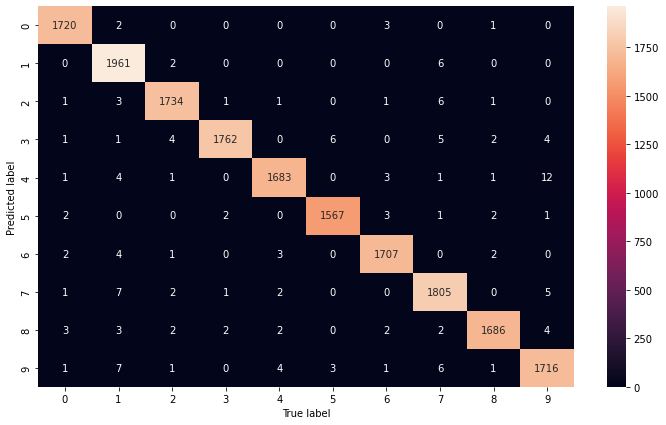

In [22]:
plt.figure(figsize=(12,7))
cm = confusion_matrix(target_test,prediction)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [23]:
#Of all the labels that model predicted, what is the percentage of them are correct
precision = precision_score(target_test, prediction, average='micro')
print('precision: %.3f' % precision)

precision: 0.991


In [24]:
#Of all the actual labels, what is the percentage of them are predicted correctly
recall=recall_score(target_test, prediction, average='micro')
print('Recall: %.3f' % recall)

Recall: 0.991


In [25]:
score = f1_score(target_test, prediction, average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.991


# **Predicting class label of a single image**

In [27]:
img = load_img("number.png", grayscale=True, target_size=(28, 28))
	# convert to array
img = img_to_array(img)
	# reshape into a single sample with 1 channel
img = img.reshape(1,28, 28, 1)
	# prepare pixel data
img = img.astype('float32')
img = img / 255.0

In [28]:
val = model.predict(img)
predicted_value = np.argmax(val)
print(predicted_value)

6
